In [88]:
import numpy as np
from matplotlib import pyplot as plt

from psrqpy import QueryATNF
import scipy.optimize as spopt


In [2]:
def force(P, K):
    return(-K/(P**2))

In [3]:
def gen_trange(tstart,tend,N):
    return(np.logspace(tstart,tend,N))

In [4]:
def trajectory(trange,P0,Pd0,K):
    P = P0
    Pd = Pd0
    
    L_P = np.zeros(len(trange))
    L_Pd = np.zeros(len(trange))
    L_P[0] = P0
    L_Pd[0] = Pd0
    
    traj_w = 1/P0 - Pd0**2/(2*K)
    
    for i in range(len(trange)-1):
        dt = trange[i+1]-trange[i]
        
        Pdd = force(P,K)
        P += Pd + Pd*dt +0.5*Pdd*(dt**2)
        Pd += Pdd*dt
        
        L_P[i+1] = P
        L_Pd[i+1] = Pd
        
    return(L_P,L_Pd,traj_w)

In [5]:
def get_pulsars():
    query = QueryATNF(condition="!type(binary)")
    table = query.table
    subset = table["P0","P1"]
    return(subset)

In [6]:
def calc_K0(P0,Pd0):
    
    K = 0.5*P0 * (Pd0**2)
    return(K)
    

In [115]:
def fit_monom(x_val,y_val):
    fitres = spopt.curve_fit(lambda x,*p: p[0]*(x**p[1]),x_val,y_val,[1e-15,1])
    return(fitres)


In [7]:
trange = gen_trange(-1,17,int(1e3))


In [8]:
test = trajectory(trange,0.03,4.22e-13,1e-28)

In [9]:
print(test[2])

-857.0866666666668


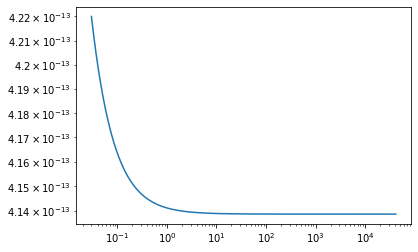

In [10]:
plt.loglog(test[0],test[1])

7.901021525448616e-14 [1.e+17]
7.149973929816516e-14 [1.e+17]
6.311017263985114e-14 [1.e+17]
5.3432421541057454e-14 [1.e+17]
4.1584727921830074e-14 [1.e+17]
2.4647164507536973e-14 [1.e+17]
3.0493332311414044e-17 []
1.49806884510592e-16 [3.851107e+12]
6.086828797520724e-16 [1.82499324e+12]
1.8644238397863091e-16 [1.15628013e+12]


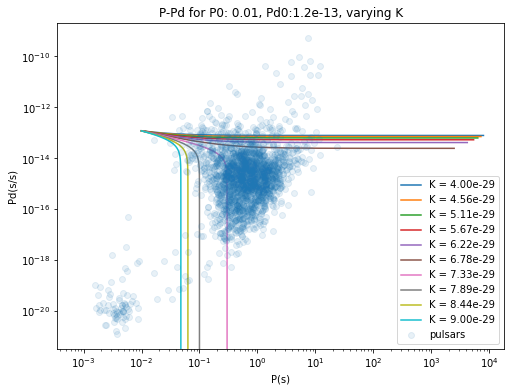

In [11]:
K_range = np.linspace(0.4,0.9,10)*1e-28


plt.figure(1,figsize=((8,6)))

yeet2 = []

for K in K_range:
    yeet = trajectory(trange,0.01,1.2e-13,K)
    plt.figure(1)
    plt.loglog(yeet[0],yeet[1],label="K = %.2e" %K)
    print(np.min(np.abs(yeet[1])),trange[np.where(yeet[1] == np.min(np.abs(yeet[1])))])
    
    if yeet2 == []:
        yeet2 = yeet
    
subset = get_pulsars()
plt.loglog(subset[0][:],subset[1][:],'o',label="pulsars",alpha=0.1)

plt.xlabel("P(s)")
plt.ylabel("Pd(s/s)")
plt.legend()
plt.title("P-Pd for P0: 0.01, Pd0:1.2e-13, varying K")
plt.savefig("P-Pd test.png")

In [12]:
Edot = -4*(np.pi**2)*yeet[1]/(yeet[0]**3)
Edot2 = -4*(np.pi**2)*yeet2[1]/(yeet2[0]**3)


Text(0, 0.5, '- Edot')

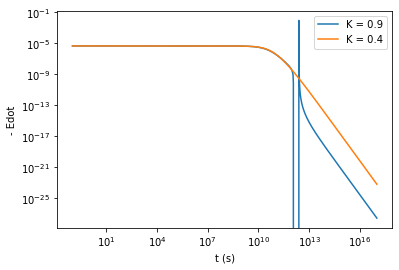

In [14]:
plt.loglog(trange,-Edot,label="K = 0.9")
plt.loglog(trange,-Edot2,label="K = 0.4")
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("- Edot")
#plt.xscale("log")

In [15]:
initrange = np.geomspace((1e-3,1e-15),(1e-1,1e-10),num=10)

In [16]:
print(initrange[:,0])

[0.001      0.0016681  0.00278256 0.00464159 0.00774264 0.0129155
 0.02154435 0.03593814 0.05994843 0.1       ]


In [17]:
K_arr = np.zeros((10,10))

for i in range(10):
    for j in range(10):

        K_arr[i][j] = calc_K0(initrange[:,0][i],initrange[:,1][j])*(0.982)

In [20]:
print(K_arr)

[[4.91000000e-34 6.34150886e-33 8.19037364e-32 1.05782743e-30
  1.36623667e-29 1.76456251e-28 2.27902012e-27 2.94346767e-26
  3.80163468e-25 4.91000000e-24]
 [8.19037364e-34 1.05782743e-32 1.36623667e-31 1.76456251e-30
  2.27902012e-29 2.94346767e-28 3.80163468e-27 4.91000000e-26
  6.34150886e-25 8.19037364e-24]
 [1.36623667e-33 1.76456251e-32 2.27902012e-31 2.94346767e-30
  3.80163468e-29 4.91000000e-28 6.34150886e-27 8.19037364e-26
  1.05782743e-24 1.36623667e-23]
 [2.27902012e-33 2.94346767e-32 3.80163468e-31 4.91000000e-30
  6.34150886e-29 8.19037364e-28 1.05782743e-26 1.36623667e-25
  1.76456251e-24 2.27902012e-23]
 [3.80163468e-33 4.91000000e-32 6.34150886e-31 8.19037364e-30
  1.05782743e-28 1.36623667e-27 1.76456251e-26 2.27902012e-25
  2.94346767e-24 3.80163468e-23]
 [6.34150886e-33 8.19037364e-32 1.05782743e-30 1.36623667e-29
  1.76456251e-28 2.27902012e-27 2.94346767e-26 3.80163468e-25
  4.91000000e-24 6.34150886e-23]
 [1.05782743e-32 1.36623667e-31 1.76456251e-30 2.27902012e

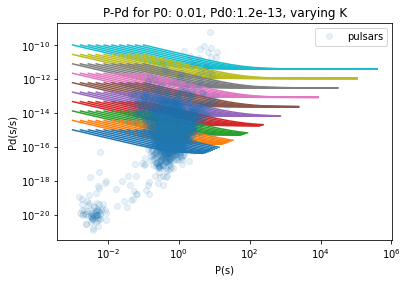

In [21]:
#endpoints 

for i in range(10):
    
    for j in range(10):
        yeet = trajectory(trange,initrange[:,0][i],initrange[:,1][j],K_arr[i][j])
    #yeet = trajectory(trange,initrange[:,0][i],initrange[:,1][i],K_arr[i])

        plt.figure(1)
        plt.loglog(yeet[0],yeet[1])
    
    
    
    
    
plt.loglog(subset[0][:],subset[1][:],'o',label="pulsars",alpha=0.1)

plt.xlabel("P(s)")
plt.ylabel("Pd(s/s)")
plt.legend()
plt.title("P-Pd for P0: 0.01, Pd0:1.2e-13, varying K")
plt.savefig("P-Pd test.png")

999
[9.97596362e-18 1.00018167e+00]


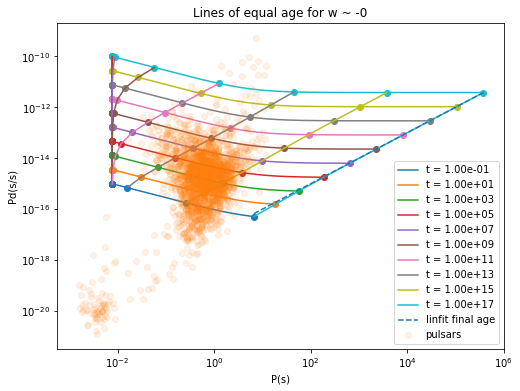

In [123]:
plt.figure(1,figsize=(8,6))


tindic = np.floor(np.linspace(0,len(trange)-1,10)).astype(int)
traj_num = np.zeros((len(K_arr[0]),2,len(trange)))

for i in range(10):
    
    yeet = trajectory(trange,initrange[:,0][4],initrange[:,1][i],K_arr[4][i])
    
    plt.figure(1)
    plt.loglog(yeet[0],yeet[1])
    
    plt.scatter(yeet[0][tindic],yeet[1][tindic])
    
    
    
    
    
    traj_num[i] = np.array([yeet[0],yeet[1]])

traj_arr = np.array(traj_arr)
    
    
#7 different times, draw spline through them
for i in tindic:
    plt.loglog(traj_num[:,0,i],traj_num[:,1,i],'-',label="t = %.2e"%(trange[i]))

print(i)

aaaa = fit_monom(traj_num[:,0,i],traj_num[:,1,i])
plt.loglog(traj_num[:,0,i],aaaa[0][0]*traj_num[:,0,i]**aaaa[0][1],'--',label="linfit final age")

print(aaaa[0])

plt.loglog(subset[0][:],subset[1][:],'o',label="pulsars",alpha=0.1)

plt.xlabel("P(s)")
plt.ylabel("Pd(s/s)")
plt.legend()
plt.title("Lines of equal age for w ~ -0")
plt.savefig("equal_age2.png")

In [103]:
aaaa = fit_monom(traj_num[:,0,i],traj_num[:,1,i])
print(aaaa)

(array([1.2231411e-17, 1.0000000e+00]), array([[ 6.84940734e-34, -1.89484349e-25],
       [-1.89484349e-25,  5.24672815e-17]]))


In [25]:
print(len(trange))

1000


999
(array([9.99999995e-18, 1.00000000e+00]), array([[ 6.12540292e-47, -3.82359896e-31],
       [-3.82359896e-31,  2.38815290e-15]]))


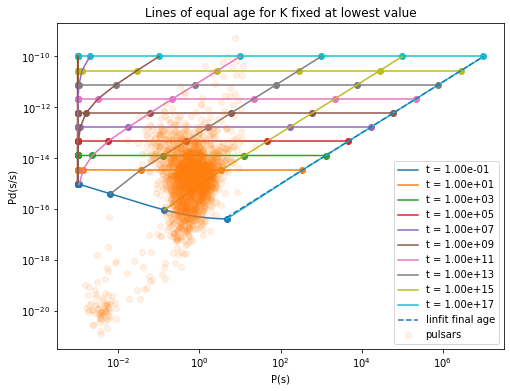

In [118]:
plt.figure(1,figsize=(8,6))

tindic = np.floor(np.linspace(0,len(trange)-1,10)).astype(int)
traj_num = np.zeros((len(K_arr[0]),2,len(trange)))

for i in range(10):
    
    yeet = trajectory(trange,initrange[:,0][0],initrange[:,1][i],K_arr[0][0])
    
    plt.figure(1)
    plt.loglog(yeet[0],yeet[1])
    
    plt.scatter(yeet[0][tindic],yeet[1][tindic])
    
    
    
    
    
    traj_num[i] = np.array([yeet[0],yeet[1]])

traj_arr = np.array(traj_arr)
    
    
#7 different times, draw spline through them
for i in tindic:
    plt.loglog(traj_num[:,0,i],traj_num[:,1,i],'-',label="t = %.2e"%(trange[i]))

print(i)

aaaa2 = fit_monom(traj_num[:,0,i],traj_num[:,1,i])
print(aaaa2)
plt.loglog(traj_num[:,0,i],aaaa2[0][0]*traj_num[:,0,i]**aaaa2[0][1],'--',label="linfit final age")

plt.loglog(subset[0][:],subset[1][:],'o',label="pulsars",alpha=0.1)

plt.xlabel("P(s)")
plt.ylabel("Pd(s/s)")
plt.legend()
plt.title("Lines of equal age for K fixed at lowest value")
plt.savefig("equal_age_fixed_K.png")